## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np
import matplotlib.cbook as cbook
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
# Combine the data into a single dataset
combined_study_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
combined_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
drug_type = combined_study_df.groupby("Drug Regimen")
drug_summary = drug_type.describe()["Tumor Volume (mm3)"]
drug_summary

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar plots

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
plot_chart = combined_study_df["Drug Regimen"].value_counts()
#treatment_number = drugclass["Timepoint"].count()
#plot_chart = pd.DataFrame({"Treatment Number": treatment_number})
plot_chart

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

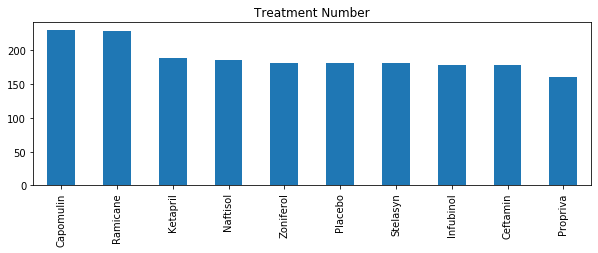

<Figure size 432x288 with 0 Axes>

In [5]:
plot_chart.plot(kind="bar", figsize=(10,3))

# Set a title for the chart
plt.title("Treatment Number")

plt.show()
plt.tight_layout()

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

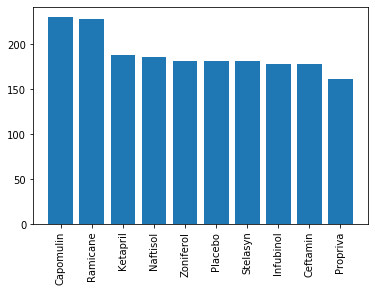

In [7]:
plt.bar(plot_chart.index.values, plot_chart.values)
plt.xticks(rotation=90)
plt.show()

## Pie plots

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gendercount = combined_study_df.groupby("Sex").count()
gendercount = gendercount["Mouse ID"]
gendercount

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

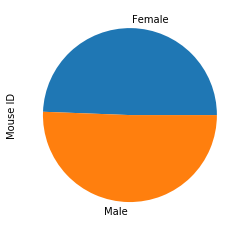

In [9]:
gendercount.plot(kind="pie")

(-1.1045613723658971,
 1.1002172082078998,
 -1.1027130801595115,
 1.105172849624489)

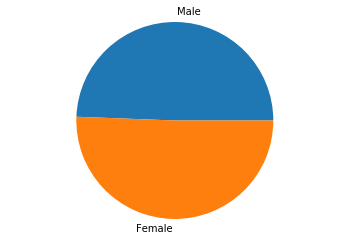

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_label = ["Male", "Female"]
plt.pie(gendercount, labels=gender_label)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

## Quartiles, outliers and boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

In [12]:
#maximum tumor 
maximum_tumor = combined_study_df.groupby("Mouse ID").max()
maximum_tumor = maximum_tumor.reset_index()
maximum_tumor.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [13]:
#preview the mergedata dataset 
mergedata = maximum_tumor[["Mouse ID", "Timepoint"]].merge(combined_study_df, on=["Mouse ID", "Timepoint"], how="left")
mergedata
ramicane = mergedata.loc[mergedata["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
infubinol = mergedata.loc[mergedata["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
ceftamin = mergedata.loc[mergedata["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
capomulin = mergedata.loc[mergedata["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]

mergedata.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [14]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [15]:
#stats for ramicane
quartiles = ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [16]:
#stats for infubinol
quartiles = infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [17]:
#stats for ceftamin
quartiles = ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [18]:
#stats for capomulin
quartiles = capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


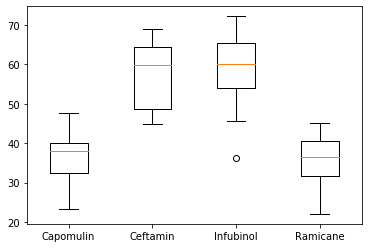

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([capomulin, ceftamin, infubinol, ramicane], labels=["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]);


## Line and scatter plots

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#use loc for capomulin for a single mouse

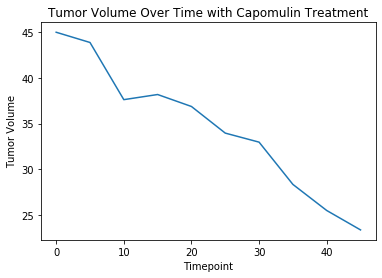

In [86]:
capomulin = combined_study_df.loc[combined_study_df["Drug Regimen"] == "Capomulin"]
lineplot = capomulin.loc[capomulin["Mouse ID"] == "s185"]
plt.plot(lineplot["Timepoint"], lineplot["Tumor Volume (mm3)"])
plt.title("Tumor Volume Over Time with Capomulin Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume");

In [56]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data = capomulin.groupby(["Mouse ID", "Weight (g)"]).mean()["Tumor Volume (mm3)"].reset_index()
capomulin_data.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [58]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#grouby mouse ID for average tumor volume plt.scatter
#scatterplot_data = combined_study_df.groupby(["Mouse ID", "Weight (g)"]).mean()["Tumor Volume (mm3)"].reset_index()
#scatterplot_data.head()

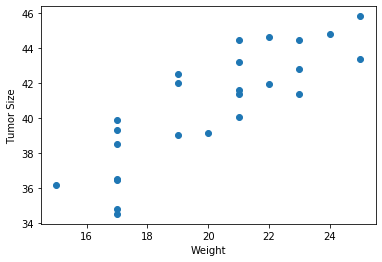

In [73]:
x_values = capomulin_data["Weight (g)"]
y_values = capomulin_data["Tumor Volume (mm3)"]
plt.scatter(x_values,y_values)
plt.xlabel('Weight')
plt.ylabel('Tumor Size')
plt.show()

In [29]:
# Calculate the correlation coefficient and linear regression model for mouse weight and 
#average tumor volume for the Capomulin regimen


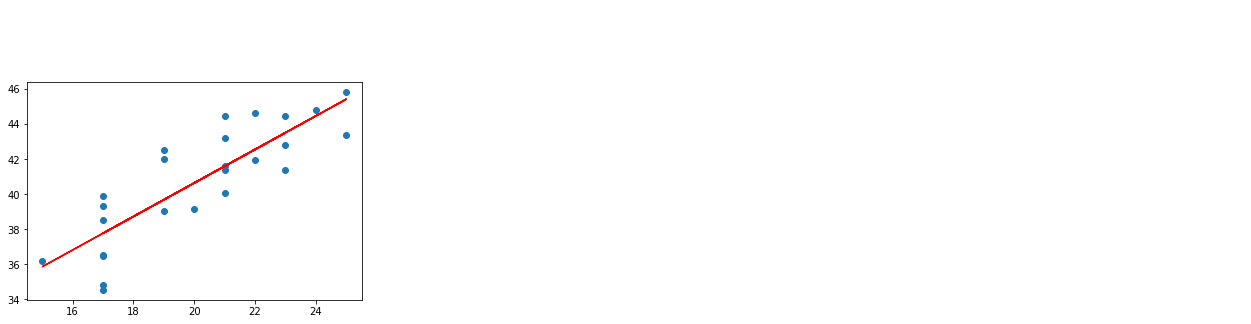

In [91]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (50,50), fontsize=15,color="red");

In [66]:
print(f"The r-squared is: {rvalue}")
print(f"The linear regression model for Weight (g) x Average Tumor Volume (mm3) is {line_eq}")

The r-squared is: 0.8419363424694718
The linear regression model for Weight (g) x Average Tumor Volume (mm3) is y = 0.95x + 21.55
